# Regression and Model Selection

In this notebook I will demonstrate my understanding of overfitting and underfitting using regression as an example. First I will generate a 1-dimensional feature space and an array of values for each row in the feature space. Then I will create regresion estimators based on linear regression (`x**1`) and polynomial regression (2nd, 4th and 6th degree, i.e. `x**2`, `x**4`  and `x**6`). I will show that the higher the polynomial, the better the fit for the train set, but the worse the fit for the test set. I will visually support my case.

I will re-use code from the [Python Data Science Handbook](http://bit.ly/2y3xzKw). To proof my understanding of the code I am re-using, I will comment on the code in my own words, both in MarkDown cells and in frequent code comment.

## 1. create test data

Generate 50 random x-values between 0 and 10
and 50 random y-values between -1,0 and 1,0 and align them around the sine-curve

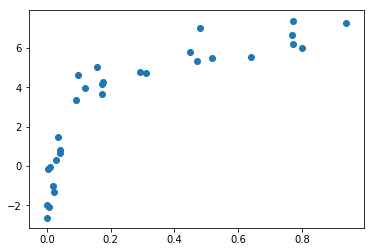

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#Creates Random data (like in book) 
#What does rseed describe? It is not the range
def make_data(N, err=1.0, rseed=1): 
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 8 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

#Create a set of 40 numerical values with the method above
X, y = make_data(30)
plt.scatter(X, y)#visualizes data points

## 2. create the regression pipeline

[your comment goes here]

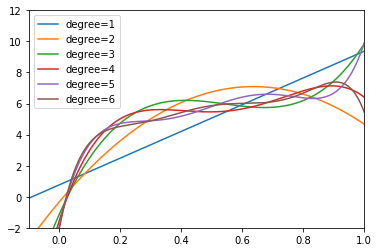

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))


X_test = np.linspace(-0.1, 1.1, 500)[:, None]

axis = plt.axis()
#For loop to create 6 different pipelines, fit, predict and plot them
for degree in [1, 2, 3, 4, 5, 6]: 
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

## 3. show the regressors

[your comment goes here]

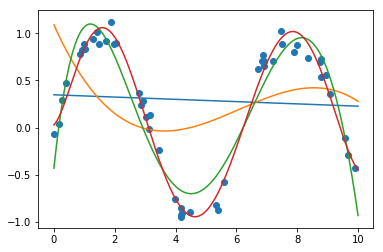

In [4]:
plt.scatter(x, y)
plt.plot(xfit, yfit1);
plt.plot(xfit, yfit3);
plt.plot(xfit, yfit5);
plt.plot(xfit, yfit7);

## 4. show the validation curve

[your comment goes here]

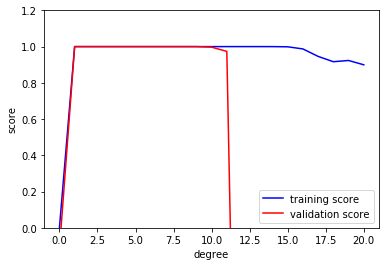

In [5]:
# your code goes here
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), np.vstack((x, y)).T,y ,
                                          'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1.2)
plt.xlabel('degree')
plt.ylabel('score');


## 5. conduct grid search to find the optimal regressor

[your comment goes here]

In [ ]:
# your code goes here